# José Mtanous A00169781
### Semana 6
###  Python for Data Science Module 4 - Model Development

#### Desarrollo de Modelos
Un modelo es una ecuacuión matemática usada para precedecir el valor de una o más variables, relacionano una o más variables independientes a variables
dependientes.
Gemeralmente la calidad de las predicciones de nuestro modelo están relacionadas con la relevancia de nuestros datos y la cantidad de estos.
En el capitulo 4 del curso vamos a ver los siguientes modelos:
- Regresión Lineal Simple
- Regresión Lineal Múltiple
- Regresión Polinomial


#### Regresión Lineal Simple
En el modelo de regresión lineal simple solamente se usa una solo variable para hacer las predicciones.
En este modelo intentamos ajustar nuestros datos a la siguiente eqcuación linea: $y = b_1x + b_0$

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


# Generamos un set de pruebas sin ruido en donde bias = b0
X, y = make_regression(n_features=1, n_samples=10, bias=10, noise=0.0, random_state=0)

lr = LinearRegression()
lr.fit(X,y)
print('b1 = ', lr.coef_[0])
print('b0 = ',lr.intercept_)

# una vez que entrenamos el modlo podemos hacer predicciones
print( lr.predict([[10]])[0] )

b1 =  79.17250380826647
b0 =  10.0
801.7250380826647


#### Regresión Lineal Múltiple
En el modelo de regresión lineal múiltiple se usan varias variables o *features* para predecir una varible.
Por ejemplo si tenemos 2 variables, la ecuación que intentamos ajustar será $y = b_0 + b_1x_1 + b_2x_2$

In [70]:
# Para este caso vamos a crear un set de datos con 2 variable 
X, y = make_regression(n_features=2, n_samples=100, bias=10, noise=0.0, random_state=0)
lr = LinearRegression()
lr.fit(X,y)
b1, b2 = lr.coef_
print('b2 = ', b2)
print('b1 = ', b1)
print('b0 = ',lr.intercept_)

b2 =  96.19363785472291
b1 =  29.214752679254886
b0 =  9.999999999999996


#### Evaluación de Modelos usando viasualizaciones


<AxesSubplot:>

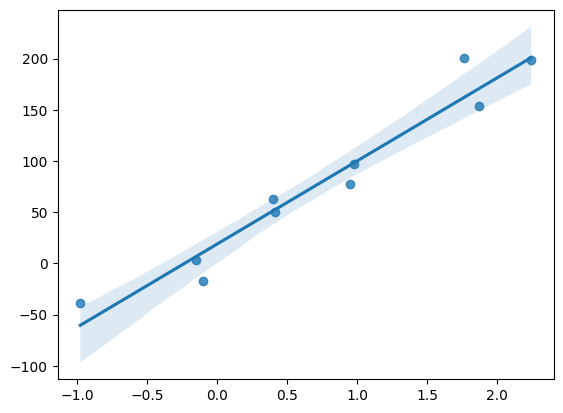

In [73]:
# Gráfica de regresión unsando seaborn
import seaborn as sns
# Generamos un set de pruebas com ruido ruido en donde bias = b0
X, y = make_regression(n_features=1, n_samples=10, bias=10, noise=20, random_state=0)

sns.regplot(x=X, y=y)


<AxesSubplot:>

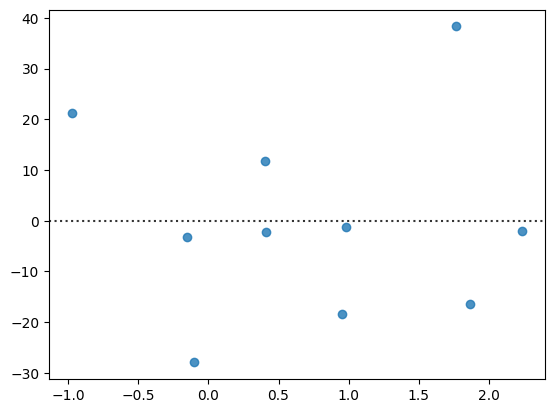

In [78]:
# Otra gráfica importante para visualizar la calidad de nuestro modelo es la de residuo
lr = LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(X)
sns.residplot(x=X, y=y-y_hat)


# si nuestro modelo es adecuado, la gráfica de residuo no tiene que tener patrones y ser semejante a ruido aleatorio

/home/jmtanous/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/home/jmtanous/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

<AxesSubplot:ylabel='Density'>

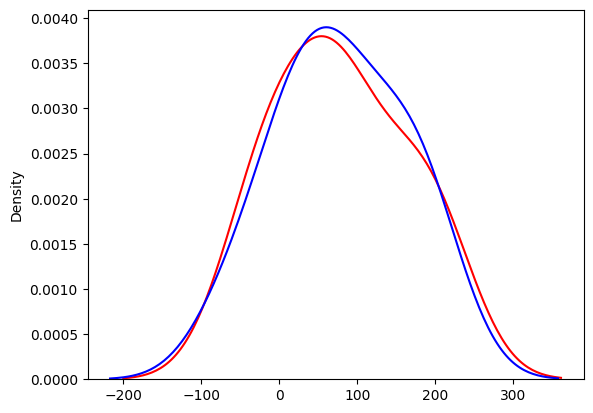

In [86]:
# Las gráficas de distribución también son muy útiles para enteder la calidad de nuestro modelo

ax1 = sns.distplot(y, hist=False, color="r", label="Valor real")
sns.distplot(y_hat, hist=False, color="b", label='Predicción', ax=ax1)

# Esta gráfica nos permite comparar los rangos de valores de entrada que funcionan bien para las predicciones

#### Regresión Polinomial
La regresón polinomial es el caso general de la regresión multiple, para este caso usamos polinomios de orden arbitrario para modelar nuestros datos. A diferencia de la regresión lineal, la regresión polinomial se puede ajusta a cualquier tipo
arbitrario de curva.
Por ejemplo, podemos usar un polinomio cuadrático para ajusta nuestros datos, en este caso la curva que tendriamos que ajustar sería $y = b_0 + b_1x_1 + b_2x_1^2$

In [91]:
# Por ejemplo así podemos ajustar nuestros datos a un polinomio de segundo orden
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
pr.fit_transform([[1,2]])

array([[1., 2., 1., 2., 4.]])

#### Normalización
Muchos algorítmos privilegian los valores grandes a la hora de hacer el modelado. Para evitar este sesgo, podemos normalizar los datos.

In [97]:
# sklearn tiene funcionalidad dedicada al normalizado de datos
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_features=1, n_samples=10, bias=100, noise=20, random_state=123)
sc = StandardScaler()

X_scaled = sc.fit_transform(X)


#### Pipelines
Los pipelines nos sirven para encapsular y aplicar una secuencia de pasos ordenada a nuestro set de datos. Por ejemplo, podemos usar un pipeline para normalizar nuestros datos, despues transformarlos y por último ajustarlos a un modelo.

In [115]:
from sklearn.pipeline import Pipeline
pasos = [('escalado', StandardScaler()),('transformacionPolinomial', PolynomialFeatures(degree=2)),('modelo',LinearRegression())]
pipe = Pipeline(pasos)

# ahora podemos usar los pasos
X = np.array([1,2,3,4,5])
y = np.square(X)
y = y + 5
pipe.fit(X.reshape(-1,1),y)
pipe.predict([[10]])

array([105.])

#### Evaluación numérica del desempeño de los modelos
Podemos usar al menos 2 métricas para evaluar el desempleño de nuestros modelos:
- MSE
- $R^2$

In [117]:
#MSE
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_features=1, n_samples=100, bias=10, noise=20, random_state=0)

lr = LinearRegression()
lr.fit(X,y)
yHat = lr.predict(X)

mean_squared_error(y,yHat)


456.68594467277927

In [118]:
#R Square
lr.score(X,y)

0.8033357286556448